# Chapter 7

.............................................

## Learning Goals

- `pandas`
- Apply() Operations
- Resample
- Rolling
- String operations
- Missing data
- Data input and output, file types
- Time Operations
- Advanced indexing, multilevel indexing
- Visulation with `pandas`
- Advanced plot controls

## Authors

- Mert Candar, mccandar@gmail.com
- Aras Kahraman, aras.kahraman@hotmail.com

## Learning Curve Boosters

https://github.com/justmarkham/pandas-videos

https://github.com/joeyajames/Python/tree/master/Pandas

https://pandas.pydata.org/pandas-docs/stable/reference/

## Goals
- Read
- Manipulate
- Analyze
- Compute

## 1 - String Operations

In [1]:
import numpy as np
import pandas as pd

In [2]:
orders = pd.read_table(r"C:\Users\PC\python_lectures\data\orders.tsv")

In [3]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
orders.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [5]:
orders.item_name

0                Chips and Fresh Tomato Salsa
1                                        Izze
2                            Nantucket Nectar
3       Chips and Tomatillo-Green Chili Salsa
4                                Chicken Bowl
                        ...                  
4617                            Steak Burrito
4618                            Steak Burrito
4619                       Chicken Salad Bowl
4620                       Chicken Salad Bowl
4621                       Chicken Salad Bowl
Name: item_name, Length: 4622, dtype: object

In [6]:
orders.item_name.str.upper()

0                CHIPS AND FRESH TOMATO SALSA
1                                        IZZE
2                            NANTUCKET NECTAR
3       CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                                CHICKEN BOWL
                        ...                  
4617                            STEAK BURRITO
4618                            STEAK BURRITO
4619                       CHICKEN SALAD BOWL
4620                       CHICKEN SALAD BOWL
4621                       CHICKEN SALAD BOWL
Name: item_name, Length: 4622, dtype: object

In [7]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [8]:
orders.item_name = orders.item_name.str.upper()

In [9]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,CHIPS AND FRESH TOMATO SALSA,NaN,$2.39
1,1,1,IZZE,[Clementine],$3.39
2,1,1,NANTUCKET NECTAR,[Apple],$3.39
3,1,1,CHIPS AND TOMATILLO-GREEN CHILI SALSA,NaN,$2.39
4,2,2,CHICKEN BOWL,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [10]:
orders.item_name.str.contains("Chicken")

0       False
1       False
2       False
3       False
4       False
        ...  
4617    False
4618    False
4619    False
4620    False
4621    False
Name: item_name, Length: 4622, dtype: bool

In [11]:
orders.item_name.str.contains("Chicken".upper())

0       False
1       False
2       False
3       False
4        True
        ...  
4617    False
4618    False
4619     True
4620     True
4621     True
Name: item_name, Length: 4622, dtype: bool

In [12]:
orders.item_name.str.contains("CHICKEN")

0       False
1       False
2       False
3       False
4        True
        ...  
4617    False
4618    False
4619     True
4620     True
4621     True
Name: item_name, Length: 4622, dtype: bool

In [13]:
orders.item_name.str.len()

0       28
1        4
2       16
3       37
4       12
        ..
4617    13
4618    13
4619    18
4620    18
4621    18
Name: item_name, Length: 4622, dtype: int64

In [14]:
orders.item_name.str.join('-').head()

0    C-H-I-P-S- -A-N-D- -F-R-E-S-H- -T-O-M-A-T-O- -...
1                                              I-Z-Z-E
2                      N-A-N-T-U-C-K-E-T- -N-E-C-T-A-R
3    C-H-I-P-S- -A-N-D- -T-O-M-A-T-I-L-L-O---G-R-E-...
4                              C-H-I-C-K-E-N- -B-O-W-L
Name: item_name, dtype: object

In [15]:
orders.item_name.str.isalpha().head()

0    False
1     True
2    False
3    False
4    False
Name: item_name, dtype: bool

In [16]:
orders.item_name.str.isnumeric().head()

0    False
1    False
2    False
3    False
4    False
Name: item_name, dtype: bool

In [17]:
orders.item_name.str.count('A').head()

0    4
1    0
2    2
3    4
4    0
Name: item_name, dtype: int64

In [18]:
orders.choice_description.str.cat(sep=' ', na_rep='?')

'? [Clementine] [Apple] ? [Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]] [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]] ? [Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]] [Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]] [Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]] ? [Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Sour Cream]] [Roasted Chili Corn Salsa, [Rice, Black Beans, Cheese, Sour Cream]] [Fresh Tomato Salsa, [Fajita Vegetables, Rice, Cheese, Sour Cream, Guacamole]] ? ? [Tomatillo-Green Chili Salsa (Medium), [Pinto Beans, Cheese, Sour Cream]] [Fresh Tomato Salsa (Mild), [Black Beans, Rice, Cheese, Sour Cream, Lettuce]] [Sprite] [Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Sour Cream, Cheese, Lettuce]] ? [[Fresh Tomato Salsa (Mild), Tomatillo-Green Chili Sal

In [19]:
orders.choice_description = orders.choice_description.str.replace("[","")

In [20]:
orders

,order_id,quantity,item_name,choice_description,item_price
0,1,1,CHIPS AND FRESH TOMATO SALSA,NaN,$2.39
1,1,1,IZZE,Clementine],$3.39
2,1,1,NANTUCKET NECTAR,Apple],$3.39
3,1,1,CHIPS AND TOMATILLO-GREEN CHILI SALSA,NaN,$2.39
4,2,2,CHICKEN BOWL,"Tomatillo-Red Chili Salsa (Hot), Black Beans, ...",$16.98
...,...,...,...,...,...
4617,1833,1,STEAK BURRITO,"Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...",$11.75
4618,1833,1,STEAK BURRITO,"Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...",$11.75
4619,1834,1,CHICKEN SALAD BOWL,"Fresh Tomato Salsa, Fajita Vegetables, Pinto B...",$11.25
4620,1834,1,CHICKEN SALAD BOWL,"Fresh Tomato Salsa, Fajita Vegetables, Lettuce]]",$8.75


In [21]:
orders.choice_description = orders.choice_description.str.replace("[","").str.replace("]","")

In [22]:
orders

,order_id,quantity,item_name,choice_description,item_price
0,1,1,CHIPS AND FRESH TOMATO SALSA,NaN,$2.39
1,1,1,IZZE,Clementine,$3.39
2,1,1,NANTUCKET NECTAR,Apple,$3.39
3,1,1,CHIPS AND TOMATILLO-GREEN CHILI SALSA,NaN,$2.39
4,2,2,CHICKEN BOWL,"Tomatillo-Red Chili Salsa (Hot), Black Beans, ...",$16.98
...,...,...,...,...,...
4617,1833,1,STEAK BURRITO,"Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...",$11.75
4618,1833,1,STEAK BURRITO,"Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...",$11.75
4619,1834,1,CHICKEN SALAD BOWL,"Fresh Tomato Salsa, Fajita Vegetables, Pinto B...",$11.25
4620,1834,1,CHICKEN SALAD BOWL,"Fresh Tomato Salsa, Fajita Vegetables, Lettuce",$8.75


## 2 - Missing Data

In [23]:
url = "http://bit.ly/uforeports"

In [24]:
ufo = pd.read_csv(url)

In [25]:
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


In [26]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [27]:
ufo[["City","Colors Reported","Shape Reported","State","Time"]].head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [28]:
ufo.isnull().head(100)

,City,Colors Reported,Shape Reported,State,Time
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False
...,...,...,...,...,...
95,False,True,False,False,False
96,False,True,False,False,False
97,False,True,False,False,False
98,False,True,False,False,False


In [29]:
ufo.notnull().head(100)

,City,Colors Reported,Shape Reported,State,Time
0,True,False,True,True,True
1,True,False,True,True,True
2,True,False,True,True,True
3,True,False,True,True,True
4,True,False,True,True,True
...,...,...,...,...,...
95,True,False,True,True,True
96,True,False,True,True,True
97,True,False,True,True,True
98,True,False,True,True,True


In [30]:
ufo.sum()

Series([], dtype: float64)

In [31]:
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [32]:
ufo[ufo.City.isnull()]

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


In [33]:
ufo.shape

(18241, 5)

In [34]:
ufo_1 = ufo.dropna(how = "any")

In [35]:
ufo_1

,City,Colors Reported,Shape Reported,State,Time
12,Belton,RED,SPHERE,SC,6/30/1939 20:00
19,Bering Sea,RED,OTHER,AK,4/30/1943 23:00
36,Portsmouth,RED,FORMATION,VA,7/10/1945 1:30
44,Blairsden,GREEN,SPHERE,CA,6/30/1946 19:00
82,San Jose,BLUE,CHEVRON,CA,7/15/1947 21:00
...,...,...,...,...,...
18213,Pasadena,GREEN,FIREBALL,CA,12/28/2000 19:10
18216,Garden Grove,ORANGE,LIGHT,CA,12/29/2000 16:10
18220,Shasta Lake,BLUE,DISK,CA,12/29/2000 20:30
18233,Anchorage,RED,VARIOUS,AK,12/31/2000 21:00


In [36]:
ufo_2 = ufo.dropna(how = "all")

In [37]:
ufo_2

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


In [38]:
ufo_3 = ufo.dropna(subset = ["City","Colors Reported"], how = "any") 

In [39]:
ufo_3

,City,Colors Reported,Shape Reported,State,Time
12,Belton,RED,SPHERE,SC,6/30/1939 20:00
19,Bering Sea,RED,OTHER,AK,4/30/1943 23:00
36,Portsmouth,RED,FORMATION,VA,7/10/1945 1:30
44,Blairsden,GREEN,SPHERE,CA,6/30/1946 19:00
66,Wexford,BLUE,NaN,PA,7/1/1947 20:00
...,...,...,...,...,...
18213,Pasadena,GREEN,FIREBALL,CA,12/28/2000 19:10
18216,Garden Grove,ORANGE,LIGHT,CA,12/29/2000 16:10
18220,Shasta Lake,BLUE,DISK,CA,12/29/2000 20:30
18233,Anchorage,RED,VARIOUS,AK,12/31/2000 21:00


In [40]:
ufo["Shape Reported"].fillna(value="Unknown",inplace=True)

In [41]:
ufo["Shape Reported"].value_counts(dropna=False)

LIGHT        2803
Unknown      2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
HEXAGON         1
FLARE           1
PYRAMID         1
DOME            1
Name: Shape Reported, dtype: int64

In [42]:
df = pd.read_csv(r"C:\Users\PC\python_lectures\data\train.csv")

In [43]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [44]:
housing = df[["LotFrontage","FireplaceQu","GarageYrBlt","BsmtCond"]].copy()

In [45]:
housing.head(2)

,LotFrontage,FireplaceQu,GarageYrBlt,BsmtCond
0,65.0,NaN,2003.0,TA
1,80.0,TA,1976.0,TA


In [46]:
housing.isnull()

,LotFrontage,FireplaceQu,GarageYrBlt,BsmtCond
0,False,True,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1455,False,False,False,False
1456,False,False,False,False
1457,False,False,False,False
1458,False,True,False,False


In [47]:
housing.isnull().sum()

LotFrontage    259
FireplaceQu    690
GarageYrBlt     81
BsmtCond        37
dtype: int64

In [48]:
housing.isnull().sum()/len(housing)

LotFrontage    0.177397
FireplaceQu    0.472603
GarageYrBlt    0.055479
BsmtCond       0.025342
dtype: float64

In [49]:
housing.drop("FireplaceQu",inplace=True,axis=1)

In [50]:
garage_year_mean = housing["GarageYrBlt"].mean()

In [51]:
garage_year_mean

1978.5061638868744

In [52]:
housing["GarageYrBlt"].fillna(garage_year_mean,inplace=True)

In [53]:
front_age_mean = housing["LotFrontage"].mean()

In [54]:
front_age_mean

70.04995836802665

In [55]:
housing["LotFrontage"].fillna(front_age_mean,inplace=True)

In [56]:
housing["BsmtCond"].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [57]:
housing["BsmtCond"].fillna("TA",inplace=True)

In [58]:
housing.isnull().sum()

LotFrontage    0
GarageYrBlt    0
BsmtCond       0
dtype: int64

## 3 -  Advance Indexing & MultiIndex

In [59]:
stocks = pd.read_csv("http://bit.ly/smallstocks")

In [60]:
stocks

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


In [61]:
stocks.groupby("Symbol").Close.mean()

Symbol
AAPL    112.856667
CSCO     31.480000
MSFT     57.433333
Name: Close, dtype: float64

In [62]:
ser = stocks.groupby(["Symbol","Date"]).Close.mean()
ser

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
        2016-10-05    113.05
CSCO    2016-10-03     31.50
        2016-10-04     31.35
        2016-10-05     31.59
MSFT    2016-10-03     57.42
        2016-10-04     57.24
        2016-10-05     57.64
Name: Close, dtype: float64

In [63]:
stocks.groupby(["Date","Symbol"]).Close.mean()

Date        Symbol
2016-10-03  AAPL      112.52
            CSCO       31.50
            MSFT       57.42
2016-10-04  AAPL      113.00
            CSCO       31.35
            MSFT       57.24
2016-10-05  AAPL      113.05
            CSCO       31.59
            MSFT       57.64
Name: Close, dtype: float64

In [64]:
ser.index

MultiIndex([('AAPL', '2016-10-03'),
            ('AAPL', '2016-10-04'),
            ('AAPL', '2016-10-05'),
            ('CSCO', '2016-10-03'),
            ('CSCO', '2016-10-04'),
            ('CSCO', '2016-10-05'),
            ('MSFT', '2016-10-03'),
            ('MSFT', '2016-10-04'),
            ('MSFT', '2016-10-05')],
           names=['Symbol', 'Date'])

In [65]:
ser.unstack()

Date,2016-10-03,2016-10-04,2016-10-05
Symbol,,,
AAPL,112.52,113.00,113.05
CSCO,31.50,31.35,31.59
MSFT,57.42,57.24,57.64


In [66]:
ser

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
        2016-10-05    113.05
CSCO    2016-10-03     31.50
        2016-10-04     31.35
        2016-10-05     31.59
MSFT    2016-10-03     57.42
        2016-10-04     57.24
        2016-10-05     57.64
Name: Close, dtype: float64

In [67]:
ser.loc["AAPL"]

Date
2016-10-03    112.52
2016-10-04    113.00
2016-10-05    113.05
Name: Close, dtype: float64

In [68]:
ser.loc["AAPL", "2016-10-03"]

112.52

In [69]:
ser.loc[:, "2016-10-04"]

Symbol
AAPL    113.00
CSCO     31.35
MSFT     57.24
Name: Close, dtype: float64

### 3.1. Resample

In [70]:
df_apple = pd.read_csv(r"C:\Users\PC\python_lectures\data\apple.csv", parse_dates =["date"], index_col ="date")

In [71]:
df_apple.head(10)

,close,volume,open,high,low
date,,,,,
2021-07-09 16:00:00,192.23,"46,541,444",191.72,197.18,191.4501
2018-11-13 00:00:00,192.23,46725710.0000,191.63,197.18,191.4501
2018-11-12 00:00:00,194.17,50991030.0000,199.00,199.85,193.7900
2018-11-09 00:00:00,204.47,34317760.0000,205.55,206.01,202.2500
2018-11-08 00:00:00,208.49,25289270.0000,209.98,210.12,206.7500
2018-11-07 00:00:00,209.95,33291640.0000,205.97,210.06,204.1300
2018-11-06 00:00:00,203.77,31774720.0000,201.92,204.72,201.6900
2018-11-05 00:00:00,201.59,66072170.0000,204.30,204.39,198.1700
2018-11-02 00:00:00,207.48,91046560.0000,209.55,213.65,205.4300


In [72]:
monthly_resampled_data = df_apple.close.resample('M').mean()

In [73]:
monthly_resampled_data.head(12)

date
2017-11-30    172.090769
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    167.638947
2018-03-31    174.496190
2018-04-30    169.834286
2018-05-31    185.536818
2018-06-30    188.621429
2018-07-31    190.311429
2018-08-31    213.346087
2018-09-30    222.073684
2018-10-31    220.845652
Freq: M, Name: close, dtype: float64

In [74]:
df_apple.close.rolling(3).mean() # ??

date
2021-07-09 16:00:00           NaN
2018-11-13 00:00:00           NaN
2018-11-12 00:00:00    192.876667
2018-11-09 00:00:00    196.956667
2018-11-08 00:00:00    202.376667
                          ...    
2017-11-17 00:00:00    171.090000
2017-11-16 00:00:00    170.410000
2017-11-15 00:00:00    170.110000
2017-11-14 00:00:00    170.506667
2017-11-13 00:00:00    171.463333
Name: close, Length: 254, dtype: float64

## 4 - Time Operations

In [75]:
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,Unknown,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


In [76]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [77]:
ufo.Time.str.slice(-5,-3).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: object

In [78]:
ufo["Time"] = pd.to_datetime(ufo.Time)

In [79]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [80]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [81]:
ufo.Time.dt.hour

0        22
1        20
2        14
3        13
4        19
         ..
18236    23
18237    23
18238    23
18239    23
18240    23
Name: Time, Length: 18241, dtype: int64

In [82]:
ufo.Time.dt.weekday

0        6
1        0
2        6
3        0
4        1
        ..
18236    6
18237    6
18238    6
18239    6
18240    6
Name: Time, Length: 18241, dtype: int64

In [83]:
ufo.Time.dt.dayofyear

0        152
1        181
2         46
3        152
4        108
        ... 
18236    366
18237    366
18238    366
18239    366
18240    366
Name: Time, Length: 18241, dtype: int64

In [84]:
pd.to_datetime("1/1/1999")

Timestamp('1999-01-01 00:00:00')

In [85]:
ts = pd.to_datetime("1/1/1999")

In [86]:
ufo.loc[ufo.Time >= ts, :]

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,Unknown,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,Unknown,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


In [87]:
ufo.Time.max()

Timestamp('2000-12-31 23:59:00')

In [88]:
ufo.Time.min()

Timestamp('1930-06-01 22:00:00')

In [89]:
ufo.Time.max() - ufo.Time.min()

Timedelta('25781 days 01:59:00')

In [90]:
(ufo.Time.max() - ufo.Time.min()).days

25781

In [91]:
ufo["Year"] = ufo.Time.dt.year

In [92]:
ufo

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933
...,...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00,2000
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00,2000
18238,Eagle River,NaN,Unknown,WI,2000-12-31 23:45:00,2000
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00,2000


## 5 - VISULATION WITH `pandas`

### 5.1. Line

In [93]:
%matplotlib inline

In [94]:
import matplotlib.pyplot as plt

In [95]:
ufo.Year.value_counts()

1999    2774
2000    2635
1998    1743
1995    1344
1997    1237
        ... 
1941       2
1936       2
1935       1
1934       1
1933       1
Name: Year, Length: 68, dtype: int64

In [96]:
ufo.Year.value_counts().sort_index()

1930       2
1931       2
1933       1
1934       1
1935       1
        ... 
1996     851
1997    1237
1998    1743
1999    2774
2000    2635
Name: Year, Length: 68, dtype: int64

<AxesSubplot:>

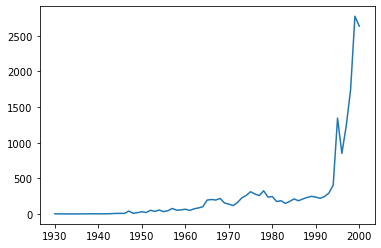

In [97]:
ufo.Year.value_counts().sort_index().plot()

In [98]:
gas_prices = pd.read_csv(r"C:\Users\PC\python_lectures\data\gas_prices.csv")

In [99]:
gas_prices

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11
5,1995,1.95,1.53,4.26,3.96,4.00,4.43,1.11,2.94,3.21,1.15
6,1996,2.12,1.61,4.41,3.94,4.39,3.64,1.25,3.18,3.34,1.23
7,1997,2.05,1.62,4.00,3.53,4.07,3.26,1.47,3.34,3.83,1.23
8,1998,1.63,1.38,3.87,3.34,3.84,2.82,1.49,3.04,4.06,1.06
9,1999,1.72,1.52,3.85,3.42,3.87,3.27,1.79,3.80,4.29,1.17


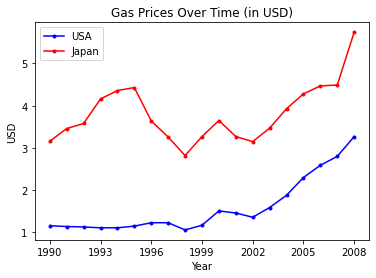

In [100]:
plt.title("Gas Prices Over Time (in USD)")

plt.plot(gas_prices.Year,gas_prices.USA,"b.-", label= "USA")
plt.plot(gas_prices.Year,gas_prices.Japan,"r.-", label= "Japan")

plt.xticks(gas_prices.Year[::3])

plt.xlabel("Year")
plt.ylabel("USD")

plt.legend()

plt.show()

### 5.2. Histogram

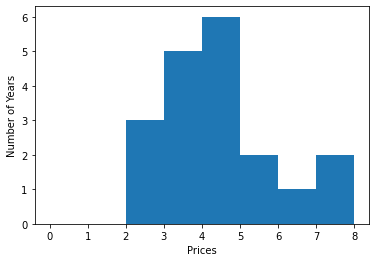

In [101]:
bins=[0,1,2,3,4,5,6,7,8]

plt.hist(gas_prices.UK,bins=bins)
plt.xticks(bins)

plt.xlabel("Prices")
plt.ylabel("Number of Years")

plt.show()

### 5.3. Pie Chart

In [102]:
high_price_UK = gas_prices.loc[gas_prices["UK"]>=4].count()[0]
high_price_GE = gas_prices.loc[gas_prices["Germany"]>=4].count()[0]
high_price_IT = gas_prices.loc[gas_prices["Italy"]>=4].count()[0]
high_price_CA = gas_prices.loc[gas_prices["Canada"]>=4].count()[0]

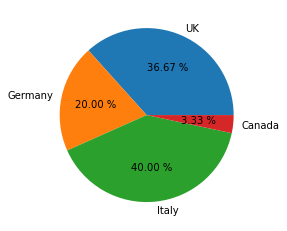

In [103]:
labels=["UK","Germany","Italy","Canada"]

plt.pie([high_price_UK,high_price_GE,high_price_IT,high_price_CA],labels=labels,autopct="%.2f %%")

plt.show()